### Training the Decision Tree Based Model

In [48]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, make_scorer
)
from sklearn.model_selection import GridSearchCV

In [33]:
# Loading the preprocessed dataset

file_path = os.path.join(os.getcwd(), "Data", "processed", "FC110572_MethuliMenya","preprocessed_data.csv")
processed = pd.read_csv(file_path)

print(f"   Information of the processed dataset \n ===================================\n")
processed.info()

   Information of the processed dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27788 entries, 0 to 27787
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27788 non-null  object 
 1   Age                               27788 non-null  float64
 2   Academic Pressure                 27788 non-null  float64
 3   CGPA                              27788 non-null  float64
 4   Study Satisfaction                27788 non-null  float64
 5   Suicidal Thoughts                 27788 non-null  int64  
 6   Work/Study Hours                  27788 non-null  float64
 7   Financial Stress                  27788 non-null  float64
 8   Family History of Mental Illness  27788 non-null  int64  
 9   Depression                        27788 non-null  int64  
 10  SleepScore                        27788 non-null  int64  
 11  DietScore                

In [34]:
# Convert all object dDtype columns to categorical Dtype
for col in processed.select_dtypes(include='object').columns:
    processed[col] = processed[col].astype('category')

processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27788 entries, 0 to 27787
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Gender                            27788 non-null  category
 1   Age                               27788 non-null  float64 
 2   Academic Pressure                 27788 non-null  float64 
 3   CGPA                              27788 non-null  float64 
 4   Study Satisfaction                27788 non-null  float64 
 5   Suicidal Thoughts                 27788 non-null  int64   
 6   Work/Study Hours                  27788 non-null  float64 
 7   Financial Stress                  27788 non-null  float64 
 8   Family History of Mental Illness  27788 non-null  int64   
 9   Depression                        27788 non-null  int64   
 10  SleepScore                        27788 non-null  int64   
 11  DietScore                         27788 non-null  int6

#### 1. Splitting Data to Isolate test data

In [35]:
features = processed.columns.drop('Depression')
target = "Depression"

# Split the preprocessed data so, 85% data goes to train and the remaining 15% for the testing.
X_train_full, X_test, y_train_full, y_test = train_test_split(processed[features], processed[target], test_size=0.15, stratify=processed[target], random_state=123)

# Split the train data set into 85% as train data and 15% as validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, stratify=y_train_full, random_state=123)

In [36]:
train_depressed_pct = (y_train.value_counts(normalize=True)[1]) * 100
val_depressed_pct = (y_val.value_counts(normalize=True)[1]) * 100
test_depressed_pct = (y_test.value_counts(normalize=True)[1]) * 100

print(f"Depressed percentage in training set: {train_depressed_pct:.2f}%")
print(f"Depressed percentage in validation set: {val_depressed_pct:.2f}%")
print(f"Depressed percentage in test set: {test_depressed_pct:.2f}%")

Depressed percentage in training set: 58.58%
Depressed percentage in validation set: 58.57%
Depressed percentage in test set: 58.58%


#### 2. Label Encoding the Gender and Degree columns

In [37]:
# Label Encoders
le_degree = LabelEncoder()
le_gender = LabelEncoder()

# Fitting Encoders on training data
X_train['Degree_Cleaned'] = le_degree.fit_transform(X_train['Degree_Cleaned'])
X_train['Gender'] = le_gender.fit_transform(X_train['Gender'])

# Transform validation data sets
X_val['Degree_Cleaned'] = le_degree.transform(X_val['Degree_Cleaned'])
X_val['Gender'] = le_gender.transform(X_val['Gender'])

# Transform test data sets
X_test['Degree_Cleaned'] = le_degree.transform(X_test['Degree_Cleaned'])
X_test['Gender'] = le_gender.transform(X_test['Gender'])

#### 3. Baseline Model

In [38]:
dt_baseline = DecisionTreeClassifier(random_state=123)
dt_baseline.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
# Baseline model prediction on train dataset
y_train_predict_baseline = dt_baseline.predict(X_train)
# Predict probabilities of depressed class on train dataset
y_train_predict_baseline_proba = dt_baseline.predict_proba(X_train)[:, 1]

In [40]:
# Baseline model prediction on validation data set
y_val_predict_baseline = dt_baseline.predict(X_val)
# Predict probabilities of depressed class on validation dataset
y_val_predict_baseline_proba = dt_baseline.predict_proba(X_val)[:, 1]

In [41]:
# Reusable function to calculate and print evaluation metrics
def evaluate_model(y_true, y_pred, y_proba, dataSetName, modelName):
    print(f"\n=={dataSetName} Performance ({modelName})==")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score  : {roc_auc_score(y_true, y_proba):.4f}")

In [42]:
#Evaluation of baseline model based on  train and validation sets

evaluate_model(y_train, y_train_predict_baseline, y_train_predict_baseline_proba, 'Train Set', 'Baseline')
evaluate_model(y_val, y_val_predict_baseline, y_val_predict_baseline_proba, 'Validation Set', 'Baseline')


==Train Set Performance (Baseline)==
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000
ROC AUC Score  : 1.0000

==Validation Set Performance (Baseline)==
Accuracy       : 0.7722
Precision      : 0.8051
Recall         : 0.8063
F1 Score       : 0.8057
ROC AUC Score  : 0.7652


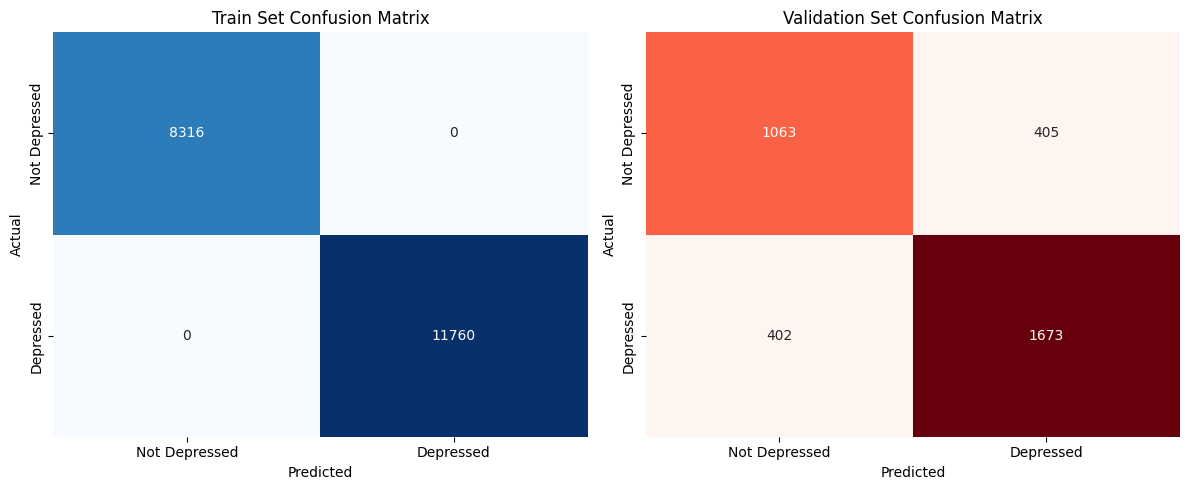

In [43]:
cm_train = confusion_matrix(y_train, y_train_predict_baseline)
cm_val = confusion_matrix(y_val, y_val_predict_baseline)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'], ax=axes[0])
axes[0].set_title("Train Set Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Validation set 
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'], ax=axes[1])
axes[1].set_title("Validation Set Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

From the results of above evaluation metrics of baseline model on train and validation datasets, we can see that 
the model shows a perfect performance on training dataset but there is a signignifant drop of performance on validation dataset.

Conclusion: Baseline model is more complex. Overfitting Detected and lacks generalization. Tree needs prunning.

So we need hyperparameter tunning for the decision tree.


#### 4. Hyperparameter Tunning

In [49]:
# use Grid Search for the Hyperparameter tunning

parameter_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

scoring = {
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=123),
    param_grid=parameter_grid,
    scoring=scoring,
    refit='f1',  
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


,estimator,DecisionTreeC...dom_state=123)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,"{'f1': make_scorer(f...hod='predict'), 'precision': make_scorer(p...hod='predict'), 'recall': make_scorer(r...hod='predict'), 'roc_auc': 'roc_auc'}"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [52]:

print(f"Best Parameters: {grid_search.best_params_}")

print(f"Best F1 Score: {grid_search.best_score_:.4f}")


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.8486



==Validation Set Performance (Tuned Model)==
Accuracy       : 0.8290
Precision      : 0.8463
Recall         : 0.8651
F1 Score       : 0.8556
ROC AUC Score  : 0.8952


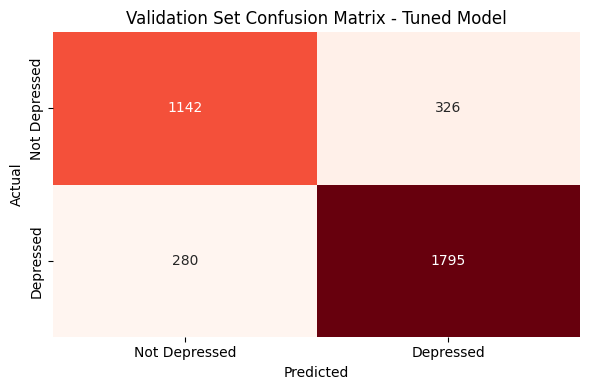

In [57]:
best_dtree = grid_search.best_estimator_

# Evaluation of tuned model based on validation dataset.

y_val_pred_tuned = best_dtree.predict(X_val)
y_val_proba_tuned = best_dtree.predict_proba(X_val)[:, 1]

evaluate_model(y_val, y_val_pred_tuned, y_val_proba_tuned, 'Validation Set', 'Tuned Model')

# confusion matrix for tuned model based on validation dataset
cm_val_tuned = confusion_matrix(y_val, y_val_pred_tuned)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_val_tuned, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Validation Set Confusion Matrix - Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


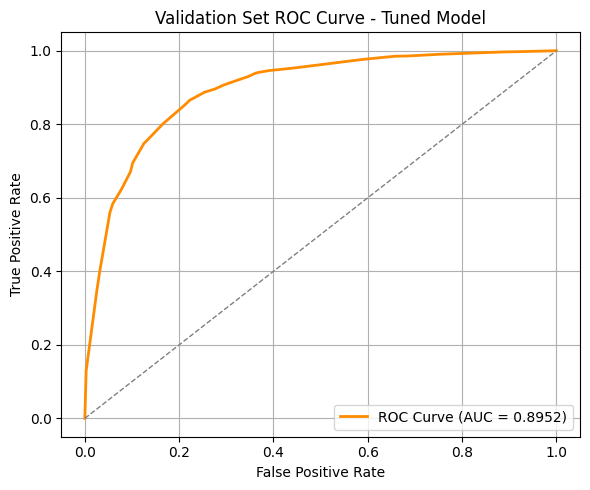

In [59]:
# From the previous baseline model validation dataset evaluation results and this tuned model's results,
# we can see that tuned model's performance is significantly better than the baseline.
# It is more accurate, more balanced, and more reliable for predicting depression.

# Futhermore we can plot the ROC curve to see the tradeoff between tuned model's True Positive Rate and False Positive Rate.

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba_tuned)
roc_auc = roc_auc_score(y_val, y_val_proba_tuned)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve - Tuned Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC curve is closer to the top-left. This also confirms that tuned model is a best fit.